# Homework 5
### ASTR-324, Spring 2018, Ivezic & Juric, University of Washington
https://github.com/uw-astr-324-s18/astr-324-s18/homeworks/Astr324-S18-HW5.ipynb


## Problem

Below in the notebook is the code that generates Figure 10.17 in the textbook. As it is now, it:
* downloads a dataset of variable stars collected with the [LINEAR](https://en.wikipedia.org/wiki/Lincoln_Near-Earth_Asteroid_Research) telescope,
* selects six of them (as given by the `ids` variable),
* computes the Lomb-Scargle periodogram in the `compute_best_frequencies` function,
* finds the best frequency by looking for the highest peak in the periodiogram, and
* folds the light curves and plots the results.

Either by modifying the code below, or by writing similar code, do the following:

1. Find the frequencies for the first 100 stars in the LINEAR datasets (i.e., those with IDs in `data.ids[:100]`, where `data` is the variable containing the LINEAR dataset as defined below).

2. Compute the periods corresponing to the frequencies above, and plot the histogram of periods using 50 bins in range $0 < T < 25$ hours. What do you observe in the histogram?

3. Generate two 6-panel figures analogous to Figure 10.17, for 6 stars (arbitrarily chosen) from the highest and second highest peak, respectivelly. Comment on (dis)similarities of the two plots and of stars within each plot.

4. EXTRA CREDIT: compute the histogram in #2 for ALL (about 7000) stars in the data set, not just the first 100 (note: this will take a while - on a Mac Pro about 5 hours). Modify the histogram range and bin sizes as needed to bring out the features (clusters) in the data. Comment on differences compared to the 100-star case. Extra credit 20% of this homework! 

In [1]:
# Figure 10.17 code

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.decorators import pickle_results
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=False)

#------------------------------------------------------------
# Compute the best frequencies
@pickle_results('LINEAR_LS.pkl')
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    for i in ids:
        t, y, dy = data[i].T
        print(" - computing power for %i (%i points)" % (i, len(t)))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        results[i] = [omega, power]

    return results

# plot phased light curves 
def plot_lightcurves(results, ids):
    #------------------------------------------------------------
    # Plot the phased light-curves
    fig = plt.figure(figsize=(15, 18))
    fig.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)

    for i in range(len(ids)):
        # get the data and best-fit angular frequency
        t, y, dy = data[ids[i]].T
        omega, power = results[ids[i]]
        omega_best = omega[np.argmax(power)]
        print(" - omega_0 = %.10g" % omega_best)

        # do a fit to the first 4 Fourier components
        mtf = MultiTermFit(omega_best, 4)
        mtf.fit(t, y, dy)
        phase_fit, y_fit, phased_t = mtf.predict(1000, return_phased_times=True)

        # plot the phased data and best-fit curves
        ax = fig.add_subplot(321 + i)
        ax.grid()
        ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                    lw=1, ms=4, capsize=1.5)
        ax.plot(phase_fit, y_fit, '-b', lw=2)

        ax.set_xlim(0, 1)
        ax.set_ylim(plt.ylim()[::-1])
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))

        ax.text(0.03, 0.04, "ID = %i" % ids[i], ha='left', va='bottom',
                transform=ax.transAxes)
        ax.text(0.03, 0.96, "P = %.2f hr" % (2 * np.pi / omega_best * 24.),
                ha='left', va='top',
                transform=ax.transAxes)

        ylim = ax.get_ylim()
        ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))

        if i < 4:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        if i % 2 == 0:
            ax.set_ylabel('mag')

        if i in (4, 5):
            ax.set_xlabel('phase')

    return fig 

In [2]:
# Load the dataset
data = fetch_LINEAR_sample()

@pickle_results: computing results and saving to 'LINEAR_LS.pkl'
    - args match:   False
    - kwargs match: True
 - computing power for 14752041 (253 points)
 - computing power for 1009459 (593 points)
 - computing power for 10022663 (246 points)
 - computing power for 10025796 (233 points)
 - computing power for 11375941 (280 points)
 - computing power for 18525697 (211 points)
 - omega_0 = 17.21695506
 - omega_0 = 51.10600808
 - omega_0 = 10.20062676
 - omega_0 = 45.55493503
 - omega_0 = 58.44512277
 - omega_0 = 10.82722772


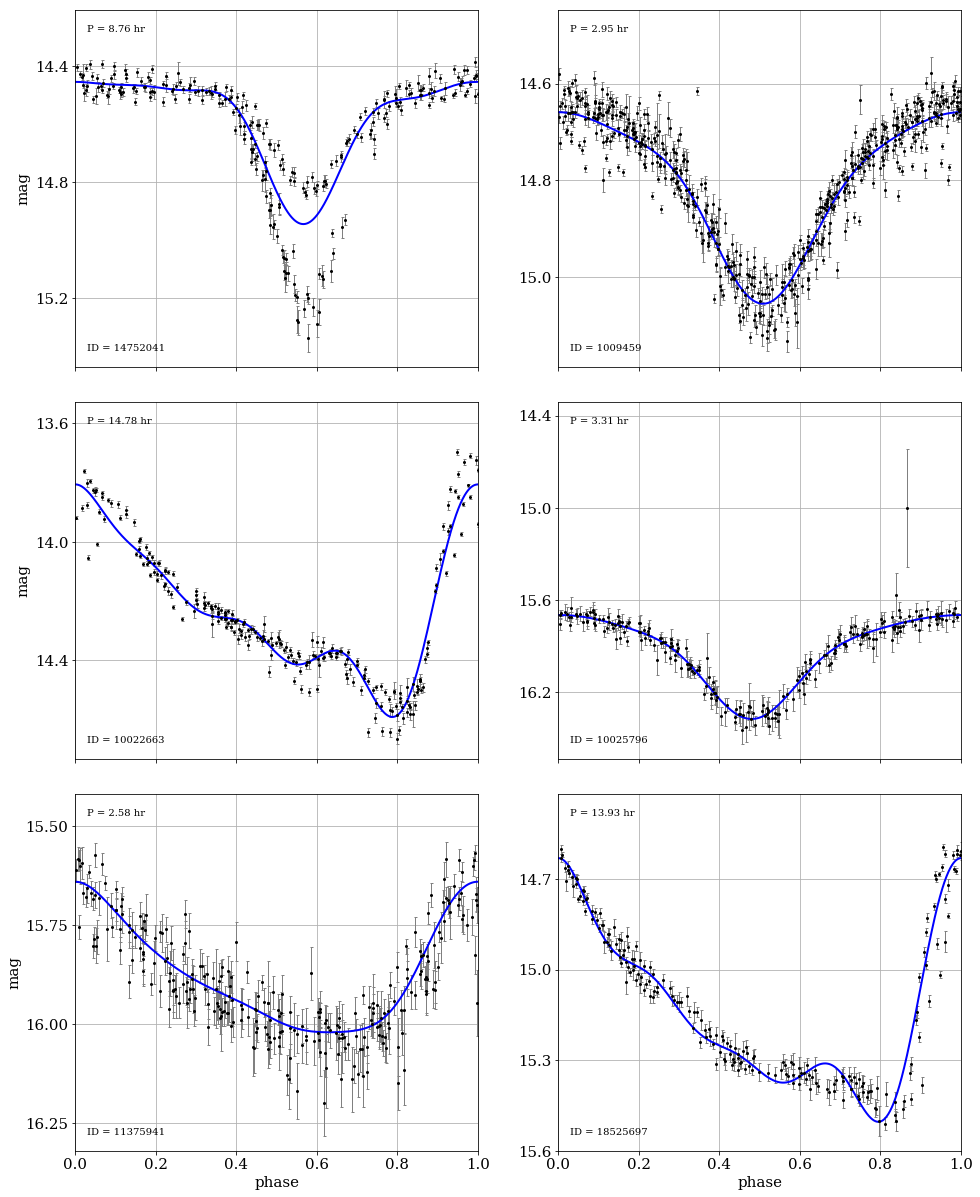

In [3]:
# select a subset of the full dataset
ids = [14752041, 1009459, 10022663, 10025796, 11375941, 18525697]

# Compute the best frequencies
results = compute_best_frequencies(ids, n_eval=10000, n_retry=5)

# Plot the phased light-curves
myprettyplot = plot_lightcurves(results, ids)

## Solution
### Part 1 & 2

Find the frequencies for the first 100 stars in the LINEAR datasets (i.e., those with IDs in data.ids[:100], where data is the variable containing the LINEAR dataset as defined below).

Compute the periods corresponing to the frequencies above, and plot the histogram of periods using 50 bins in range  0<T<25  hours. What do you observe in the histogram?

In [6]:
subset_ids = data.ids[:100]
subset_results = compute_best_frequencies(subset_ids, n_eval=10000, n_retry=5)

@pickle_results: using precomputed results from 'LINEAR_LS.pkl'


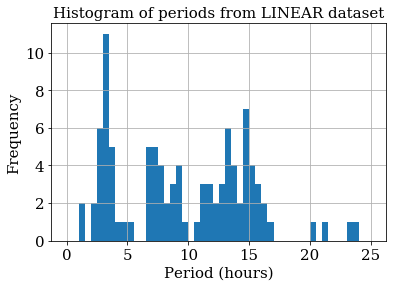

In [41]:
omega_best_list = []
power_best_list = []
idx_best_list = []
for i in subset_results.keys():
    omega,power = subset_results[i][0],subset_results[i][1]
    omega_best = omega[np.argmax(power)]
    omega_best_list.append(omega_best)
    power_best_list.append(power[np.argmax(power)])
    idx_best_list.append(i)
period_hours = 2 * np.pi/np.array(omega_best_list)*24

period_subset = period_hours[(period_hours>0) & (period_hours<25)]
bins=np.linspace(0,25,51) # 51 bin edges so 50 bins
plt.grid()
plt.title("Histogram of periods from LINEAR dataset")
plt.ylabel("Frequency")
plt.xlabel("Period (hours)")
x = plt.hist(period_subset,bins=bins);

This histogram is pretty bad because there are too many bins for too small of a dataset. It is much too jagged. Ideally we would like it to be smoother. Although if we were to decrease bin size then we would no longer be able to clearly discern where the peaks acutally are. 

### Part 3
Generate two 6-panel figures analogous to Figure 10.17, for 6 stars (arbitrarily chosen) from the highest and second highest peak, respectively. Comment on (dis)similarities of the two plots and of stars within each plot.

@pickle_results: computing results and saving to 'LINEAR_LS.pkl'
    - args match:   False
    - kwargs match: True
 - computing power for 10195209 (216 points)
 - computing power for 10352672 (209 points)
 - computing power for 10370011 (265 points)
 - computing power for 10101561 (137 points)
 - computing power for 10348090 (234 points)
 - computing power for 10025796 (233 points)
 - omega_0 = 44.99004599
 - omega_0 = 46.88253125
 - omega_0 = 45.47848749
 - omega_0 = 44.9335195
 - omega_0 = 47.11060632
 - omega_0 = 45.55493503


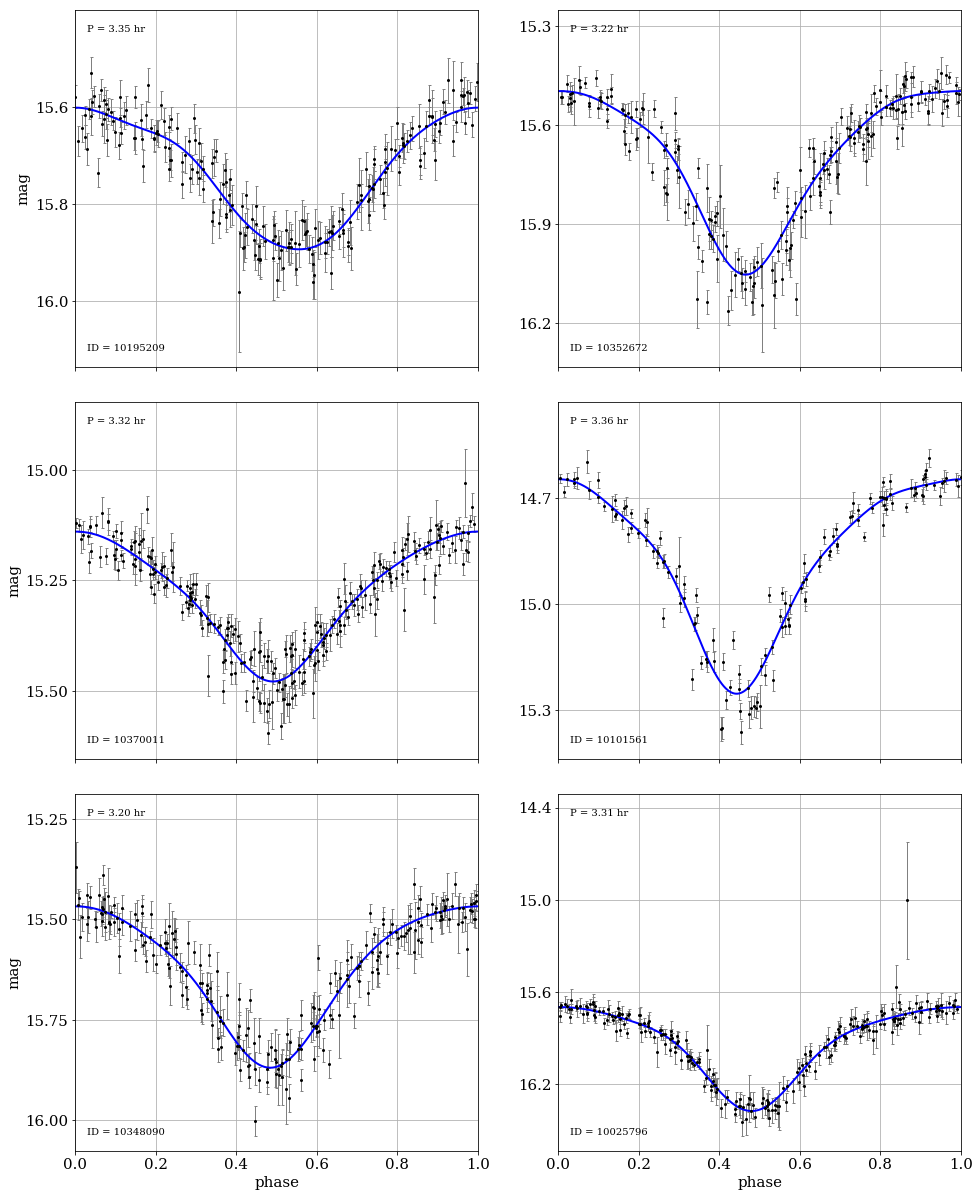

@pickle_results: computing results and saving to 'LINEAR_LS.pkl'
    - args match:   False
    - kwargs match: True
 - computing power for 10022663 (246 points)
 - computing power for 10040133 (257 points)
 - computing power for 10355826 (407 points)
 - computing power for 1034627 (167 points)
 - computing power for 10333591 (163 points)
 - computing power for 10325207 (542 points)
 - omega_0 = 10.20062676
 - omega_0 = 10.29120901
 - omega_0 = 10.14641021
 - omega_0 = 10.12829022
 - omega_0 = 10.2962605
 - omega_0 = 10.22610977


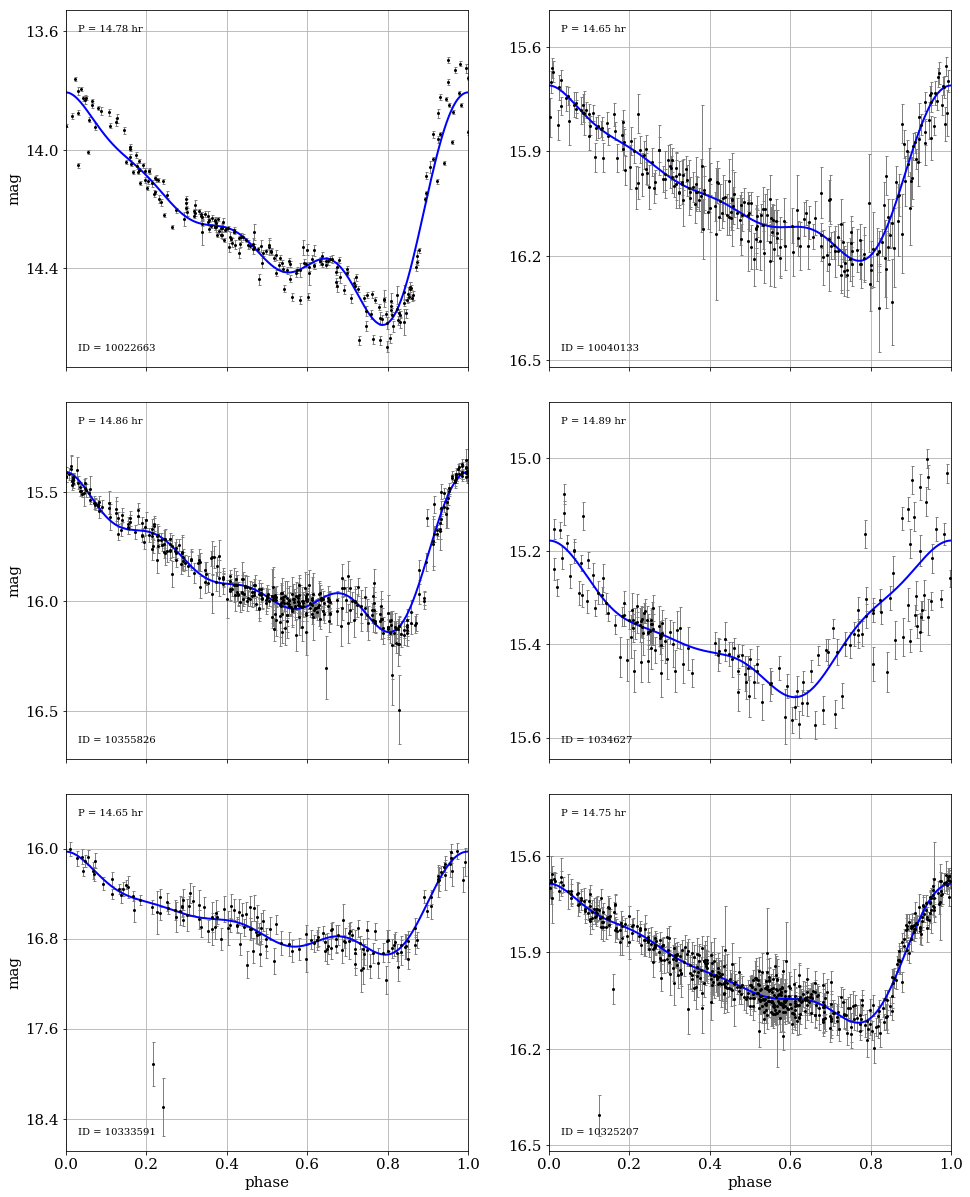

In [11]:
def P2W(P):
    """period (hours) to omega (1/days)"""
    return 2*np.pi/P*24
bin_step = bins[1]-bins[0]
peak_bin,sec_peak_bin=np.sort(x[0])[-1],np.sort(x[0])[-2]
left_bin_edges = x[1][:-1]
peak_period = left_bin_edges[x[0]==peak_bin][0]
sec_peak_period = left_bin_edges[x[0]==sec_peak_bin][0]

best_omegas = np.array(omega_best_list)
best_powers = np.array(power_best_list)
### Highest peak
mask1 = (best_omegas<P2W(peak_period))&(best_omegas>P2W(peak_period+bin_step))
indicies = np.array(idx_best_list)[mask1][:6]

results1 = compute_best_frequencies(indicies, n_eval=10000, n_retry=5)
myprettyplot = plot_lightcurves(results1, indicies)
plt.show()

### Second Highest Peak
mask2 = (best_omegas<P2W(sec_peak_period))&(best_omegas>P2W(sec_peak_period+bin_step))
indicies = np.array(idx_best_list)[mask2][:6]

results2 = compute_best_frequencies(indicies, n_eval=10000, n_retry=5)
myprettyplot = plot_lightcurves(results2, indicies)
plt.show()

#### Comment on (dis)similarities of the two plots and of stars within each plot.

When we used the highest peak, we were using a smaller period so we were probing smaller scales of the light curve (zoomed in on the dips). While when we chose the second highest peak, we were using a larger period so we were probing larger scales of the light curve (zoomed out). These were the two most periods with the most power so there must be two mechanisms causing both dips to happen simultaneously at different scales of the light curve.

## Part 4 
EXTRA CREDIT: compute the histogram in #2 for ALL (about 7000) stars in the data set, not just the first 100 (note: this will take a while - on a Mac Pro about 5 hours). Modify the histogram range and bin sizes as needed to bring out the features (clusters) in the data. Comment on differences compared to the 100-star case. Extra credit 20% of this homework!

In [15]:
all_ids = data.ids
all_results = compute_best_frequencies(all_ids, n_eval=10000, n_retry=5)

@pickle_results: using precomputed results from 'LINEAR_LS.pkl'


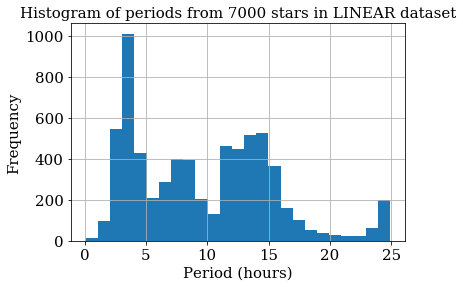

In [38]:
omega_best_list = []
power_best_list = []
idx_best_list = []
for i in all_results.keys():
    omega,power = all_results[i][0],all_results[i][1]
    omega_best = omega[np.argmax(power)]
    omega_best_list.append(omega_best)
    power_best_list.append(power[np.argmax(power)])
    idx_best_list.append(i)
period_hours = 2 * np.pi/np.array(omega_best_list)*24

period_subset = period_hours[(period_hours>0) & (period_hours<25)]
#bins=np.linspace(0,25,51) # 51 bin edges so 50 bins
bins = 'fd'
plt.grid()
plt.title("Histogram of periods from 7000 stars in LINEAR dataset")
plt.ylabel("Frequency")
plt.xlabel("Period (hours)")
x = plt.hist(period_subset,bins=bins);

For bin sizes I used Freedman-diaconis because it is a robust estimator that takes into account data variability and data size. From this we can see clustering at periods of about 3,7,and 14 hours. There also may be one at 24 hours.

The biggest differences between this and the 100 star histogram is that the histogram is less jagged and there is simply more data. Since there is more data it can flatten out the noise due to the lack of sampling. Because of this we are able to see another cluster/peak at about 7 hours that was not present in the 100 star histogram.

In [13]:
# omega_best_list = []
# power_best_list = []
# idx_best_list = []
# for i in subset_results.keys():
#     omega,power = subset_results[i][0],subset_results[i][1]
#     omega_best = omega[np.argmax(power)]
#     omega_best_list.append(omega_best)
#     power_best_list.append(power[np.argmax(power)])
#     idx_best_list.append(i)
# period_hours = 2 * np.pi/np.array(omega_best_list)*24

# period_subset = period_hours[(period_hours>0) & (period_hours<25)]
# bins=np.linspace(0,25,51) # 51 bin edges so 50 bins
# plt.grid()
# plt.title("Histogram of periods from LINEAR dataset")
# plt.ylabel("Frequency")
# plt.xlabel("Period (hours)")
# x = plt.hist(period_subset,bins=bins);